 First steps in data science with Python 

# Installation

For new comers, I recommend using the Anacaonda distribution. You can download it from [here](https://www.continuum.io/downloads).

If you are familiar with Python, create a `conda` environment and install the need libraries (using the `environment.yml` file): 

`conda env create -f environment.yml`

Then, activate the environement using: 

`conda activate workshop`

# The Python data science ecosystem

## Jupyter notebook

[Jupyter](https://jupyter.org/) notebook is the code environment we will be using today. <br>
Previously known as ipython notebook, it is an interactive environment that makes prototyping easier for data scientists.

## Pandas

[Pandas](http://pandas.pydata.org/) is the primary toolbox used for collecting and cleaning datasets from various data sources. <br>
Most of the concepts that we are exploring today can be found in the following great [cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

## Matplotlib

[Matplotlib](http://matplotlib.org/) is the standard and de facto Python library for creating visualizations.

## Numerical and statistical (numpy, scipy, statsmodels)

Alongside the above tools, Python offers a set of numerical and statistical packages to perform data analysis. 
The most famous ones are: 

* [numpy](http://www.numpy.org/): Base N-dimensional array package
* [scipy](https://www.scipy.org/scipylib/index.html): Fundamental library for scientific computing
* [statsmodels](http://www.statsmodels.org/stable/): Statistical computations and models for Python

Keep in mind that most of the capabilites of the above package are integrated within the Pandas library.

# Tidy data

This is a very important concept when doing data science. To demonstrate how important it is, let's start by creating a messy one and tidying it.

In [76]:
import pandas as pd
messy_df = pd.DataFrame({'2016': [1000, 2000, 3000], 
                         '2017': [1200, 1300, 4000], 
                         'company': 
                         ['slack', 'twitter', 'twitch']
                        })

Here, we have created a fictional dataset that contains earnings for years 2016 and 2017

In [10]:
messy_df

,2016,2017,company
0,1000,1200,slack
1,2000,1300,twitter
2,3000,4000,twitch


You might ask, what is the problem with this dataset? <br>
There are two main ones:

* The coloumns 2016 and 2017 contain the same type of variable (earnings)
* The columns 2016 and 2017 contain an information about the year 

Now that we have a "messy" dataset, let's clean it.

In [81]:
tidy_df = pd.melt(messy_df, id_vars=['company'],
                  value_name='earnings', 
                  var_name='year')

In [82]:
tidy_df

,company,year,earnings
0,slack,2016,1000
1,twitter,2016,2000
2,twitch,2016,3000
3,slack,2017,1200
4,twitter,2017,1300
5,twitch,2017,4000


That's much better! <br>

In summary, a tidy dataset has the following properties: 
    
* Each column represents only one **variable**
* Each row represents an **observation**

# Example

## Import pacakges

In [83]:
import pandas as pd
import missingno as msno

## Loading data

[Kaggle](https://www.kaggle.com/) offers many free datasets with lots of metadata, descriptions, kernels, discussions and so on. <br>
Today, we will be working with the San Francisco Salaries dataset. You can download it from [here](https://www.kaggle.com/kaggle/sf-salaries) (you need a Kaggle account) or get it from the workshop [repository](https://github.com/yassineAlouini/first-steps-data-science/blob/master/data/Salaries.csv).

The dataset we will be working with is a CSV file. Fortunately for us, Pandas has a handy method `.read_csv`.
Let's try it out!

In [84]:
sf_slaries_df = pd.read_csv('data/Salaries.csv')

/home/yassine/anaconda3/envs/datacamp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data exploration

In [85]:
sf_slaries_df.head(3).transpose()

,0,1,2
Id,1,2,3
EmployeeName,NATHANIEL FORD,GARY JIMENEZ,ALBERT PARDINI
JobTitle,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,CAPTAIN III (POLICE DEPARTMENT),CAPTAIN III (POLICE DEPARTMENT)
BasePay,167411,155966,212739
OvertimePay,0,245132,106088
OtherPay,400184,137811,16452.6
Benefits,NaN,NaN,NaN
TotalPay,567595,538909,335280
TotalPayBenefits,567595,538909,335280
Year,2011,2011,2011


In [91]:
sf_slaries_df.sample(5).transpose()

,32511,27726,118413,99312,46014
Id,32512,27727,118414,99313,46015
EmployeeName,JASMIN NORWOOD,SHALISE BILL-LINCOMB,Michael A Jazuk,Fredrick A Nelson,Amy Gray-Schlink
JobTitle,PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,PUBLIC SERVICE AIDE-ASSISTANT TO PROFESSIONALS,Senior Stationary Engineer,"Counselor, Juvenile Hall",Utility Plumber
BasePay,7402.37,32324.4,89084,46896.6,92823.2
OvertimePay,0,147.47,16705.9,3554.36,3576.2
OtherPay,0,0,11814.3,454.84,3336.03
Benefits,NaN,NaN,35911.5,18203.6,37939.1
TotalPay,7402.37,32471.9,117604,50905.8,99735.4
TotalPayBenefits,7402.37,32471.9,153516,69109.3,137674
Year,2011,2011,2014,2013,2012


In [32]:
sf_slaries_df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [86]:
sf_slaries_df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [87]:
sf_slaries_df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


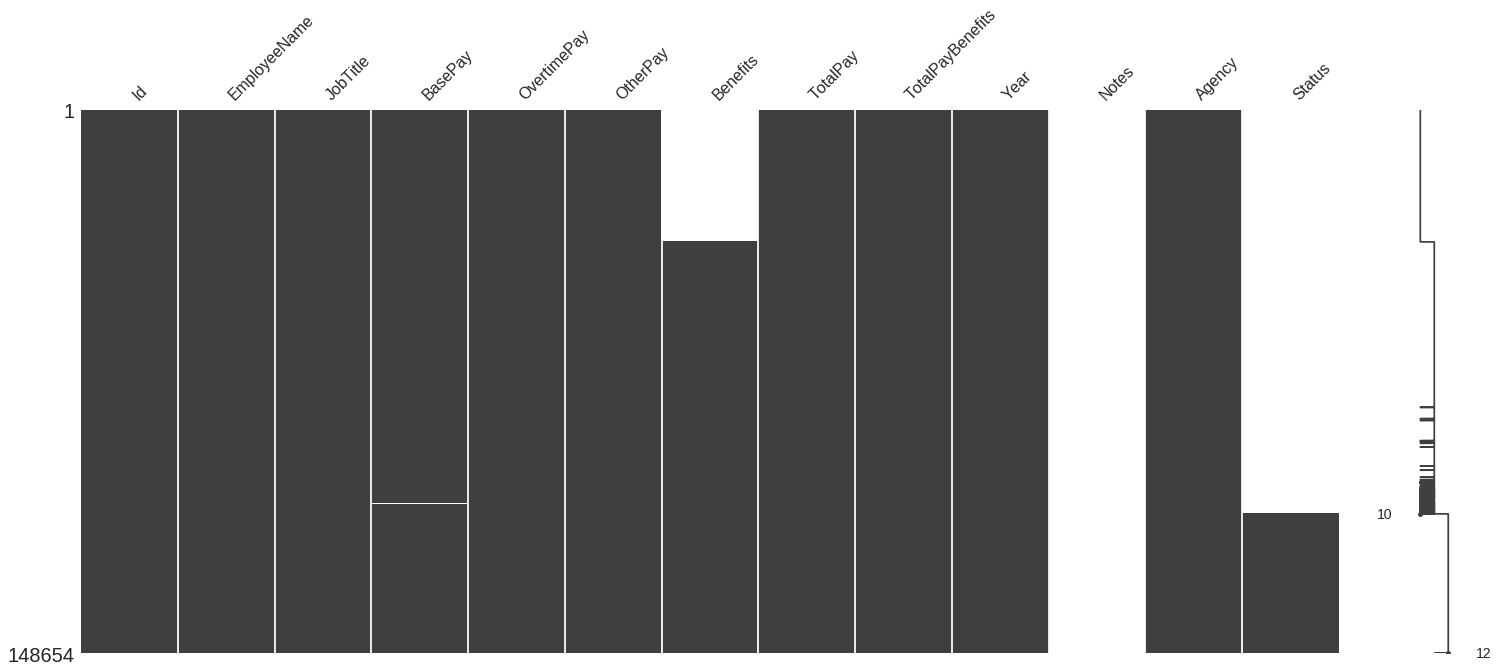

In [35]:
msno.matrix(sf_slaries_df)

## Some analysis

### What are the different job titles? How many?

In [42]:
sf_slaries_df.JobTitle.value_counts()

Transit Operator                              7036
Special Nurse                                 4389
Registered Nurse                              3736
Public Svc Aide-Public Works                  2518
Police Officer 3                              2421
Custodian                                     2418
TRANSIT OPERATOR                              2388
Firefighter                                   2359
Recreation Leader                             1971
Patient Care Assistant                        1945
Deputy Sheriff                                1933
Police Officer                                1476
SPECIAL NURSE                                 1402
Public Service Trainee                        1328
REGISTERED NURSE                              1219
Police Officer 2                              1141
Attorney (Civil/Criminal)                     1126
Porter                                        1095
Sergeant 3                                    1047
General Laborer                

In [44]:
sf_slaries_df.JobTitle.nunique()

2159

## Highest and lowest salaries per year? Which jobs?

In [62]:
sf_slaries_df.groupby('Year').TotalPay.agg(['min', 'max'])

,min,max
Year,,
2011,0.00,567595.43
2012,0.00,362844.66
2013,0.00,347102.32
2014,-618.13,471952.64


In [67]:
lowest_idx = sf_slaries_df.groupby('Year').apply(lambda df: df.TotalPay.argmin())

In [74]:
sf_slaries_df.loc[lowest_idx, ['Year', 'JobTitle']]

,Year,JobTitle
36156,2011,"STATIONARY ENGINEER, WATER TREATMENT PLANT"
70877,2012,Deputy Court Clerk II
106545,2013,Sewer Service Worker
148653,2014,"Counselor, Log Cabin Ranch"


In [71]:
highest_idx = sf_slaries_df.groupby('Year').apply(lambda df: df.TotalPay.argmax())

In [73]:
sf_slaries_df.loc[highest_idx, ['Year', 'JobTitle']]

,Year,JobTitle
0,2011,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
36159,2012,"Lieutenant, Fire Suppression"
72927,2013,"Battalion Chief, Fire Suppress"
110531,2014,Deputy Chief 3


# To wrap up

In todays's workshop, you have learned: 

* About the Python data science ecosystem (some of its parts at least)
* The concept of a tidy dataset
* How to load a dataset using Pandas
* How to explore a dataset

I hope this was insightful! <br>
See you at a next workshop hopefully.

# References/ To go beyond

I hope you have enjoyed this workshop. To continue learning, I recommend the following:
    
* A blog post on how to become a data scientist: https://www.dataquest.io/blog/how-to-become-a-data-scientist/ 
* Consider trying [dataquest](https://www.dataquest.io) and/or [datacamp](https://www.datacamp.com/) if you want to learn more about data science using Python. Notice that they both offer some free content but most of it is available for a monthly subscription
* [Quora](https://www.quora.com/): one of the best places to ask and answer questions about data science (and any other subject more generally)
* [Kaggle](https://www.kaggle.com/): this is a great place to hone your data science skills through producing and reading different kernels (these are their internal variation of notebooks)
* More generally follow great data scientists. Some that I really enjoy reading their work (in no particular order): 
    * [Wes Mckinney](http://wesmckinney.com/): original creator of Pandas.
    * [Tom Augspurger](https://tomaugspurger.github.io/): core contributor of Pandas. Has written the [modern Pandas](https://tomaugspurger.github.io/modern-1.html) blog posts series (a most read).
    * [Jake VanderPlas](http://staff.washington.edu/jakevdp/): a data scientist in academia (as he defines himself).